In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [0]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation

### Loading dataset

In [5]:
data = pd.read_csv('/content/drive/My Drive/NIIT University/Neural Networks and Deep Learning/Class 3/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
data = data[data['species'] != 'Iris-virginica']

In [0]:
data['species'] = data['species'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
#data['species'] = data['species'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1 if x == 'Iris-verginica' else 2)

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Data Splitting

In [0]:
features = data.drop(['species'], axis=1)
target = data['species']
target_encoded = np_utils.to_categorical(target)

In [11]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

In [13]:
target_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### Model Building

DAG -> Directed Acyclic Graphs

In [0]:
model = Sequential()

model.add(Dense(3, input_dim=4))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [16]:
# stochastic GD, mini batch GD, batch GD
history = model.fit(features, target, epochs=5000, verbose=2, validation_split=0.2, batch_size=1)

Train on 80 samples, validate on 20 samples
Epoch 1/500
 - 2s - loss: 0.9759 - accuracy: 0.3625 - val_loss: 0.5931 - val_accuracy: 1.0000
Epoch 2/500
 - 0s - loss: 0.9670 - accuracy: 0.3625 - val_loss: 0.5915 - val_accuracy: 1.0000
Epoch 3/500
 - 0s - loss: 0.9577 - accuracy: 0.3750 - val_loss: 0.5895 - val_accuracy: 1.0000
Epoch 4/500
 - 0s - loss: 0.9480 - accuracy: 0.3750 - val_loss: 0.5855 - val_accuracy: 1.0000
Epoch 5/500
 - 0s - loss: 0.9382 - accuracy: 0.3750 - val_loss: 0.5790 - val_accuracy: 1.0000
Epoch 6/500
 - 0s - loss: 0.9277 - accuracy: 0.3750 - val_loss: 0.5697 - val_accuracy: 1.0000
Epoch 7/500
 - 0s - loss: 0.9169 - accuracy: 0.3750 - val_loss: 0.5595 - val_accuracy: 1.0000
Epoch 8/500
 - 0s - loss: 0.9060 - accuracy: 0.3750 - val_loss: 0.5491 - val_accuracy: 1.0000
Epoch 9/500
 - 0s - loss: 0.8948 - accuracy: 0.3750 - val_loss: 0.5371 - val_accuracy: 1.0000
Epoch 10/500
 - 0s - loss: 0.8833 - accuracy: 0.3750 - val_loss: 0.5244 - val_accuracy: 1.0000
Epoch 11/500
 -

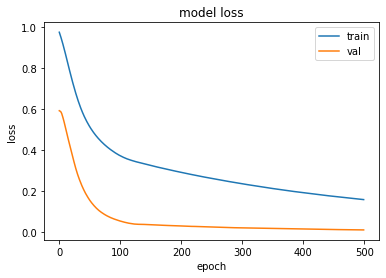

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

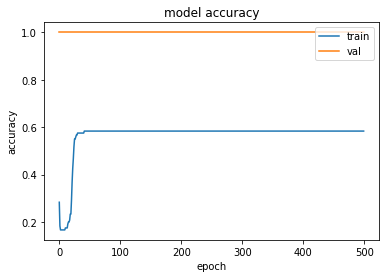

In [0]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

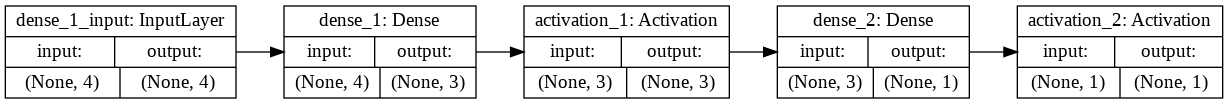

In [0]:
import keras
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Q1. Why this network converges earlier than the network we built using numpy? </br>
Q2. How the weights and biases are getting initialized here? [Solution](https://keras.io/api/layers/core_layers/dense/)
</br>
Q3. What gradient descent algorithm we are using here? Is it - batch, mini-batch or stochastic GD? </br>
Q4. What will happen if we remove or change the activation layer in hidden layer? What changes can you see in the loss? </br>
Q5. What if we convert the depend variable into dummy variables and pass it into the network? Try this using two different activation functions
</br>
Q6. Now use all the categories of dependent variable and build the model. Use softmax activation function but use `binary_crossentropy` as loss. See what do you get? Now use `categorical_crossentropy` and check what loss are you getting? Is it ok or strange. If it is strage, then look into this [link](https://twitter.com/aureliengeron/status/1110839223878184960)
</br>
Q7. What about optimizers? Try building the model with `batch_size=1` and optimizer as `adam` and with no batch size and check what happens?